# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

100%|███████████████████████████████| 159624/159624 [00:13<00:00, 11539.69it/s]

pls   -0.00054
dtype: float64
--------------------------------------
                   date ord_types               close_type      pls
109 2021-05-05 14:33:39     short  simple_slema_move_close  0.00013
110 2021-05-05 14:44:23     short  simple_slema_move_close  0.00012
111 2021-05-05 14:48:53      long  simple_slema_move_close  0.00001
112 2021-05-05 14:52:11      long  simple_slema_move_close  0.00007
113 2021-05-05 15:00:58      long  simple_slema_move_close  0.00002
114 2021-05-05 15:08:37     short               sema_close -0.00002
115 2021-05-05 15:10:52     short  simple_slema_move_close  0.00003
116 2021-05-05 15:58:18      long               sema_close -0.00058
117 2021-05-05 16:36:06      long  simple_slema_move_close  0.00032
118 2021-05-05 16:58:02      long               sema_close -0.00005
119 2021-05-05 16:58:18      long  simple_slema_move_close  0.00012
120 2021-05-05 17:04:33     short  simple_slema_move_close  0.00002
121 2021-05-05 18:17:38      long  simple_slema

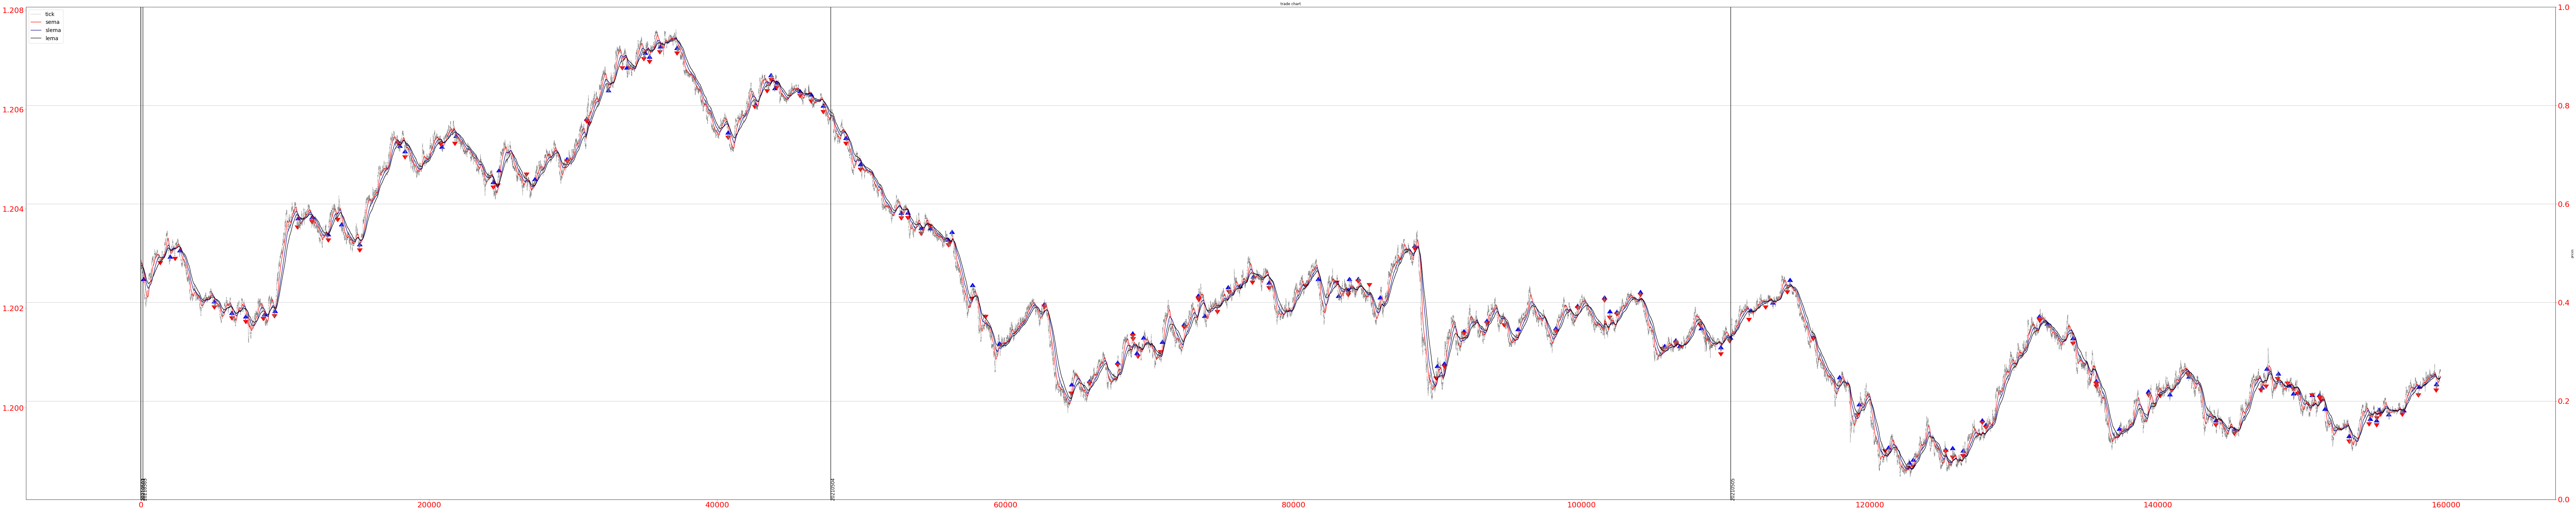

-----------------------------------------------------
date_val          : ['20210501', '20210502', '20210503', '20210504', '20210505']
Total PL : -0.0005399999999999989
-------------
net_pl            : -0.00054/0.04684
-------------
+ve               : num= 73    sum= +0.02315    avg= +0.00032
-ve               : num= 51    sum= -0.02369    avg= -0.00046
-----------------------------------------------------
month_val
5   -0.00054
Name: pls, dtype: float64
-----------------------------------------------------
simple_slema_move_close    71
sema_close                 53
Name: close_type, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')